In [1]:
import yaml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from doa.utils import create_dataset
import os

In [54]:
# df = pd.read_csv('sample_data/curated-solubility-dataset.csv')
# dfn = df.sample(n=1200)
# dfn.to_csv('sample_data/data.csv', index=False)

# df = pd.read_csv('sample_data/des_data.csv')
# train = df.iloc[:1000,:]
# test = df.iloc[1000:,:]
# set(test.smiles).intersection(train.smiles)

# train.to_csv('sample_data/train.csv', index=False)
# test.to_csv('sample_data/test.csv', index=False)

# 1. Create molecular descriptors

We can use Mordred to quickly generate a set of descriptors. We have provides a function in doa/utils to prepare a dataset in 
the form required by the res of the DoA calculations 

In [57]:
_  = create_dataset(csv_path='sample_data/data.csv', 
                smiles_column='SMILES',
                logs_column='Solubility', 
                save_path='sample_data/des_data.csv')

[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
[10:32:06] WARNING: not removing hydrogen atom without neighbors
  0%|▏                                                                                       | 2/1200 [00:02<23:22,  1.17s/it][10:32:08] WARNING: not removing hydrogen atom without neighbors
[10:32:08] WARNING: not remov

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


  5%|████▎                                                                                  | 59/1200 [00:09<03:57,  4.81it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 12%|██████████▎                                                                           | 144/1200 [00:21<03:12,  5.50it/s][10:32:27] WARNING: not removing hydrogen atom without neighbors
[10:32:27] WARNING: not removing hydrogen atom without neighbors
[10:32:27] WARNING: not removing hydrogen atom without neighbors
[10:32:27] WARNING: not removing hydrogen atom without neighbors
[10:32:27] WARNING: not removing hydrogen atom without neighbors
[10:32:27] WARNING: not removing hydrogen atom without neighbors
[10:32:27] WARNING: not removing hydrogen atom without neighbors
[10:32:27] WARNING: not removing hydrogen atom without neighbors
[10:32:27] WARNING: not removing hydrogen atom without neighbors
 19%|████████████████▎                                                                     | 227/1200 [00:37<06:41,  2.42it/s][10:32:44] WARNING: not removing hydrogen atom without neighbors
[10:32:44] WARNING: not removing hydrogen atom without neighbors
[10:32:44] WARNING: not removing 

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 25%|█████████████████████▋                                                                | 302/1200 [00:44<03:21,  4.45it/s][10:32:50] WARNING: not removing hydrogen atom without neighbors
[10:32:50] WARNING: not removing hydrogen atom without neighbors
[10:32:50] WARNING: not removing hydrogen atom without neighbors
 28%|███████████████████████▉                                                              | 334/1200 [00:50<02:29,  5.80it/s][10:32:57] WARNING: not removing hydrogen atom without neighbors
[10:32:57] WARNING: not removing hydrogen atom without neighbors
[10:32:57] WARNING: not removing hydrogen atom without neighbors
 32%|███████████████████████████                                                           | 378/1200 [00:54<01:13, 11.20it/s][10:33:03] WARNING: not removing hydrogen atom without neighbors
[10:33:03] WARNING: not removing hydrogen atom without neighbors
[10:33:03] WARNING: not removing hydrogen atom without neighbors
 32%|███████████████████████████▉    

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 36%|███████████████████████████████▎                                                      | 437/1200 [01:08<02:20,  5.44it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 39%|█████████████████████████████████▊                                                    | 471/1200 [01:10<01:32,  7.90it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 43%|████████████████████████████████████▉                                                 | 516/1200 [01:20<03:18,  3.44it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 46%|███████████████████████████████████████▍                                              | 550/1200 [01:23<01:43,  6.26it/s][10:33:30] WARNING: not removing hydrogen atom without neighbors
[10:33:30] WARNING: not removing hydrogen atom without neighbors
[10:33:30] WARNING: not removing hydrogen atom without neighbors
 47%|████████████████████████████████████████▋                                             | 568/1200 [01:24<01:05,  9.58it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 54%|██████████████████████████████████████████████▏                                       | 645/1200 [01:36<01:23,  6.66it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 57%|█████████████████████████████████████████████████▎                                    | 688/1200 [01:44<02:24,  3.55it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 62%|█████████████████████████████████████████████████████▊                                | 750/1200 [01:50<00:48,  9.21it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 64%|███████████████████████████████████████████████████████                               | 769/1200 [01:53<01:02,  6.91it/s][10:34:00] WARNING: not removing hydrogen atom without neighbors
[10:34:00] WARNING: not removing hydrogen atom without neighbors
[10:34:00] WARNING: not removing hydrogen atom without neighbors
[10:34:00] WARNING: not removing hydrogen atom without neighbors
[10:34:00] WARNING: not removing hydrogen atom without neighbors
[10:34:00] WARNING: not removing hydrogen atom without neighbors
 66%|████████████████████████████████████████████████████████▌                             | 789/1200 [01:57<00:51,  7.92it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 67%|█████████████████████████████████████████████████████████▋                            | 805/1200 [02:00<01:56,  3.39it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 87%|██████████████████████████████████████████████████████████████████████████           | 1045/1200 [02:38<00:31,  4.95it/s]

/people/pana982/.conda/envs/esmi38/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


 89%|███████████████████████████████████████████████████████████████████████████▌         | 1066/1200 [02:40<00:17,  7.84it/s][10:34:46] WARNING: not removing hydrogen atom without neighbors
[10:34:46] WARNING: not removing hydrogen atom without neighbors
[10:34:46] WARNING: not removing hydrogen atom without neighbors
100%|█████████████████████████████████████████████████████████████████████████████████████| 1200/1200 [02:59<00:00,  6.68it/s]
/people/pana982/.local/lib/python3.8/site-packages/sklearn/utils/extmath.py:986: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/people/pana982/.local/lib/python3.8/site-packages/sklearn/utils/extmath.py:991: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
/people/pana982/.local/lib/python3.8/site-packages/sklearn/utils/extmath.py:1021: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction *

The descriptors will be saved to 'sample_data/des_data.csv'

# Outlier detection

Execute the following command to run a large number of ML models to find the prediction errors made for each molecule

In [68]:
!python ../scripts/run_models.py --config ../scripts/configs/main.yaml --run-id=1

/people/pana982/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
outlier detection using extratrees regression
100%|█████████████████████████████████████████| 250/250 [33:15<00:00,  7.98s/it]


Once completed, we will have "smiles_error_et_{i}.pkl" files in the folder specified by "res_path" in the configuration file (i.e ../scripts/configs/main.yaml).

Next we have to determine how to seperate outliers and inliers. After ordering the molecules in the descending order of the outliernerss, we select n percentage of molecules having the largest outlierness scores as outliers and the others as inliers. Using the selected non outliers, we do cross validated prediction of the target property and obtain the mean prediction accuracies (RMSE, R2). We repeat this process for several n values (0.95 to to 0.65). The following command executes this procedeure.

In [69]:
!python ../scripts/post_process.py  --config ../scripts/configs/main.yaml

/people/pana982/.local/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
min : 13 mean:  25.0 sdev:  4.760672221441002
percent:  0.95
percent:  0.9
percent:  0.85
percent:  0.8
percent:  0.75
percent:  0.7
percent:  0.65


Using the "find_olpercent" function, we can obtain R2 scores corresponding to different n values.

In [70]:
from doa.detect import find_olpercent
opt = yaml.load(open('../scripts/configs/main.yaml'), Loader=yaml.FullLoader)
olp_versus_r2, enpls, df = find_olpercent(data_path=opt['data_path'], res_path=opt['res_path'], 
                                          rerun_threshold_detection=False)

This is our results. We see that as the outlier percentage (olp) increases, we get better R2, RMSE values for the corresponding inliers.

In [71]:
olp_versus_r2

,r2,rmse,olp,prolp
0,0.858408,0.854682,5.0,0
1,0.867295,0.801132,10.0,1
2,0.884076,0.731742,15.0,2
3,0.894372,0.682719,20.0,3
4,0.904112,0.638319,25.0,4
5,0.912949,0.601790,30.0,5
6,0.923747,0.554798,35.0,6


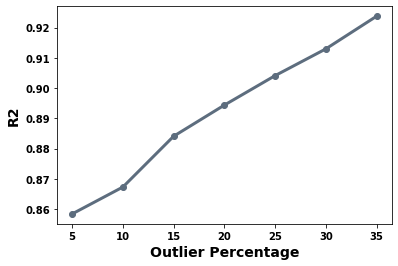

In [72]:
plt.plot(olp_versus_r2.olp, olp_versus_r2.r2,  color='#5D6D7E', marker='o', ls='-', lw=3);
# plt.plot(m4.olp, m4.r2, 'o-', color='orange', label='ol-ness sdev away');

plt.ylabel("R2", fontsize=14, fontweight='bold')
plt.xlabel("Outlier Percentage", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold');
plt.yticks(fontsize=10, fontweight='bold');

Now we have to determine which R2 score value which use to seperate outliers and inliers. The molecules giving a R2 score greater than this value will be considered as non outliers and the others will be outliers.

In [73]:
r2_threshold = 0.90

In [74]:
print(olp_versus_r2.loc[np.where((olp_versus_r2.r2> r2_threshold ))[0][0], 'olp'])
th_file_id = olp_versus_r2.loc[np.where((olp_versus_r2.r2> r2_threshold ))[0][0], 'prolp']
print(th_file_id)

25.0
4


In [75]:
from doa.utils import save_ols

In [76]:
save_ols(opt['res_path'], th_file_id)

# Feature based filtering

### Get the DoA table

In [77]:
from doa import doa

In [79]:
errors = pd.read_csv('results/runs/errors.csv')
df_ol = pd.read_csv(os.path.join(opt['res_path'], 'outliers.csv'))
df_nol = pd.read_csv(os.path.join(opt['res_path'], 'non_outliers.csv'))
all_data = pd.read_csv(opt['data_path'])

In [84]:
doa_obj = doa.find_th(ol=df_ol, nol=df_nol, all_data=all_data, enpls=errors)
# remove features that more than 0.95 correlated
new_th = doa_obj.remove_corr_from_propth(0.95)
    # get the domain of applicability tables
doa_orig, doa_olness = doa_obj.get_doa_table()
doa_obj.save_data(opt['res_path'])
# #ols => number of outliers in all_data (train+val)
doa_olness['all_out_pcnt'] = doa_olness['#ols']/all_data.shape[0]

In [86]:
# print(doa_olness.loc[:20, ['prop', 'threshold', 'direction', 'all_out_pcnt']].to_latex(index=False, float_format='%.3f'))

In [87]:
print(doa_olness.loc[:20, ['prop', 'threshold', 'direction', 'all_out_pcnt']].to_markdown(index=False))

| prop        |   threshold | direction   |   all_out_pcnt |
|:------------|------------:|:------------|---------------:|
| IC0         |    0.657481 | >=          |          0.002 |
| IC1         |    0.814787 | >=          |          0.004 |
| Mpe         |    0.86574  | >=          |          0.003 |
| IC2         |    1.60164  | >=          |          0.023 |
| IC3         |    1.81215  | >=          |          0.028 |
| Mi          |    1.07587  | >=          |          0.028 |
| AATS0dv     |   16.6811   | <=          |          0.036 |
| ATSC3d      |    7.94068  | <=          |          0.013 |
| ATSC1v      | -299.8      | >=          |          0.029 |
| bpol        |   47.9571   | <=          |          0.048 |
| ATSC1p      |   -2.37158  | >=          |          0.054 |
| ATSC1m      | -178.072    | >=          |          0.027 |
| AATSC0dv    |    7.06984  | <=          |          0.031 |
| SaaCH       |   22.3919   | <=          |          0.025 |
| CIC0        |    1.093

### Run feature based filtering

In [89]:
train = pd.read_csv(opt['data_path'])
test = pd.read_csv('sample_data/test.csv')

In [91]:
from doa.fbf import fbf_results

In [93]:
# create the object
fbf_obj = fbf_results(df_ref=train, df_train=train, df_test=test, save_path=opt['res_path'])
# train a model using train set
model, scaler, features = fbf_obj.get_model_scaler()
# do feature based filtering
doa_results, all_outsmiles, ol_test_smiles = fbf_obj.get_doa_results(doa=doa_olness, r2_th=.95)
doa_results['n_test_percent'] = 100*doa_results['n_test_ols']/train.shape[0]

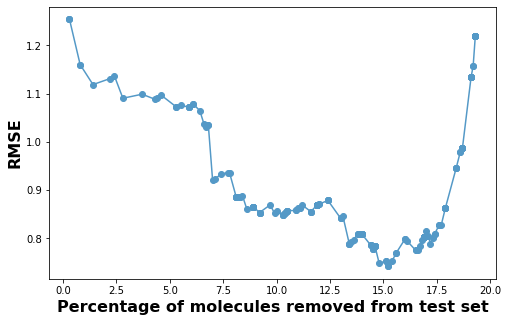

In [100]:
plt.figure(figsize = (8,5));
plt.plot(doa_results.n_test_percent, doa_results.rmse,  color='#5499C7', ls='-', marker='o', label = 'Domain based Filtering');
plt.xlabel('Percentage of molecules removed from test set', fontsize=16, fontweight='bold');
plt.ylabel('RMSE', fontsize=16, fontweight='bold');

In [16]:
# def save_ols(res_path, th_file_id):
#     ols_path = os.path.join(res_path, 'ol_thresh_res')
#     df_ol = pd.read_csv(f"{ols_path}/outliers_olness_p{th_file_id}.csv")
#     df_nol = pd.read_csv(f"{ols_path}/non_outliers_olness_p{th_file_id}.csv")

#     df_ol.to_csv(f'{res_path}/outliers.csv', index=False)
#     df_nol.to_csv(f'{res_path}/non_outliers.csv', index=False)

In [10]:
import os 

In [13]:
th_file_id=4

In [15]:
df_ol

,ABC,ABCGG,nAcid,nBase,nAromAtom,nAromBond,nAtom,nHeavyAtom,nSpiro,nBridgehead,...,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2,smiles,log_sol
0,8.554231,7.309128,0,0,10,11,17,11,0,0,...,41.498380,146.059246,8.591720,144,14,56.0,64.0,2.444444,Cc1ncc2nccnc2n1,-0.119100
1,16.130564,13.378913,0,0,10,11,43,21,0,0,...,54.845496,286.156895,6.654812,986,31,108.0,123.0,4.541667,COC1=CC2=C(C=C1)C=C(C(C)C(=O)OC(C)(C)C)C=C2,-6.500000
2,0.000000,0.000000,1,1,0,0,3,2,0,0,...,2.000000,55.969665,18.656555,100000000,0,0.0,0.0,0.000000,[Na+].[SH-],0.990089
3,0.000000,0.000000,1,1,0,0,3,2,0,0,...,2.000000,149.908192,49.969397,100000000,0,0.0,0.0,0.000000,[OH-].[Cs+],0.824164
4,28.164816,22.676732,2,2,18,18,69,38,0,0,...,74.894538,566.152123,8.205103,3700004216,64,192.0,226.0,8.250000,[Na+].CCN(CC)c1ccc(cc1)[C+](c2ccc(cc2)N(CC)CC)...,-0.406689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,26.067060,21.457796,0,1,6,6,60,33,0,0,...,70.433553,457.184900,7.619748,2672,75,188.0,239.0,6.972222,CN(C)C1C2CC3CC4=C(C=CC(=C4C(=O)C3=C(O)C2(O)C(=...,-0.940000
246,5.496696,5.754673,2,3,0,0,17,9,0,0,...,33.704756,136.059640,8.003508,2000000027,2,28.0,23.0,2.333333,NN=C(N)N.OC(O)=O,-1.615379
247,21.505581,17.416792,0,0,9,10,36,27,0,0,...,77.128343,367.055283,10.195980,1669,49,150.0,183.0,5.750000,O=C1NC(=O)C(C(=O)N1)=C2NC(c3ccccc23)=C4C(=O)NC...,-7.564994
248,8.898979,8.883053,0,0,6,6,30,12,0,0,...,43.309911,162.140851,5.404695,174,21,60.0,72.0,2.666667,CC1=C(C)C(=C(C)C(=C1C)C)C,-5.230000
